[1] "Pooled Variance:  15.2994203042933        True Variance:  16"

[1] "T : -1.42735875365407        Critical T:  -1.66055121706573"

[1] "accept H0"

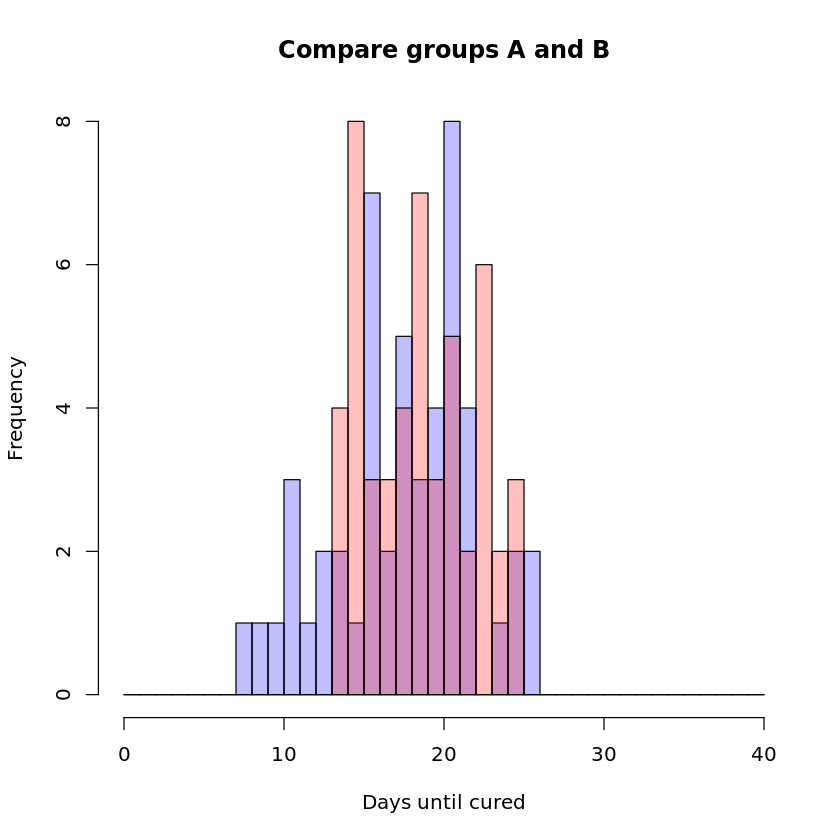

In [6]:
# 2 independent sample test for the mean (2-sample t-test)
# 
# Situation: Want to see if a new drug X is more effective than the existing drug Y.
# We take 2 random groups of patients willing to participate in the study.
# n1 patients in group X receive the new treatment, n2 patients in group Y receive the old one.
# Let X_i be the observed time in days it takes patient X_i to heal, same for Y_j.
# We assume the same variance for both treatments (not guaranteed!)

# 2 groups: n1 samples X_1..X_n1, n2 samples Y_1..Y_n2

# Generate some data to test on

n1=50
n2=50
sigma= 4

X=rnorm(n = n1,mean = 18,sd = sigma)   #new drug on average reduces healing time, but variance is large
Y=rnorm(n = n2,mean = 19,sd = sigma)   #sd are equal, as assumed

histx <- hist(X, breaks = seq(0,40,by=1),plot="FALSE")                     # centered at 4
histy <- hist(Y, breaks = seq(0,40,by=1),plot="FALSE")                     # centered at 6
plot( histx, col=rgb(0,0,1,1/4), xlim=c(0,40), ylim=c(0,max(c(histx$counts,histy$counts))), xlab = "Days until cured", main = "Compare groups A and B")  # first histogram
plot( histy, col=rgb(1,0,0,1/4), xlim=c(0,40), add=T)  # second

#1) Research hypothesis: new drug is better than old drug (which we know is true)
#H1: mu_x < mu_y  -->> H0: mu_x >= mu_y

#2) significance
alpha=0.05

#3) Compute test statistic
S= sqrt( ((n1-1)*sd(X)^2+(n2-1)*sd(Y)^2)/(n1+n2-2)  )
T= (mean(X)-mean(Y))/S * sqrt( (n1*n2)/(n1+n2))

#4) Critical region

#H0 will have to be rejected if mu_x<mu_y. Small values of T will disprove H0 and prove H1.
TK=qt(p = alpha,df = n1+n2-2)

#5) decide

# If T > K, reject H0, accept H1, your drug is better than the old at the significance level alpha.

# Show all output:

paste('Pooled Variance: ',S^2, '       True Variance: ',sigma^2 )
paste('T :', T, '       Critical T: ', TK)
if (T<TK) {paste('reject H0')} else {paste('accept H0')}
